In [3]:
import pandas as pd
import numpy as np

from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
from google.colab import data_table

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

Install library dari luar dimana disini saya menginstall dari kaggle

In [4]:
!pip install kaggle

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Kaggle'
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [7]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
data = pd.read_csv('/content/gdrive/MyDrive/Kaggle/diabetes_prediction_dataset.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Diabetes adalah variabel target yang diprediksi, dengan nilai 1 menunjukkan adanya diabetes dan 0 menunjukkan tidak

In [10]:
data.shape

(100000, 9)

Dataset mengandung 100.000 record dan 9 kolom

Mengecek apaka ada nilai null atau tidak

In [11]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Menampilkan data teratas pada dataframe

In [12]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Feature Gender (Jenis Kelamin)

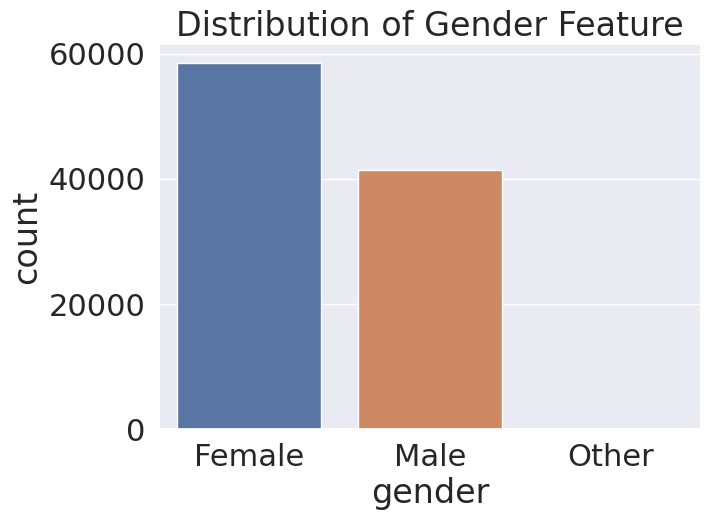

In [13]:
plt.figure(figsize=(7,5))
sns.set(font_scale=2)
sns.countplot(x='gender',data=data);
plt.title("Distribution of Gender Feature");

Menghitung banyaknya gender female dan male

In [14]:
data.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

Sehingga didapat bahwa ada 58552 Female dan 41430 Male pada dataset ini

Membuat plot tentang penyebaran diabetes berdasarkan dari riwayat merokok(smoking_history) yang mengacu pada jenis kelamin(gender)

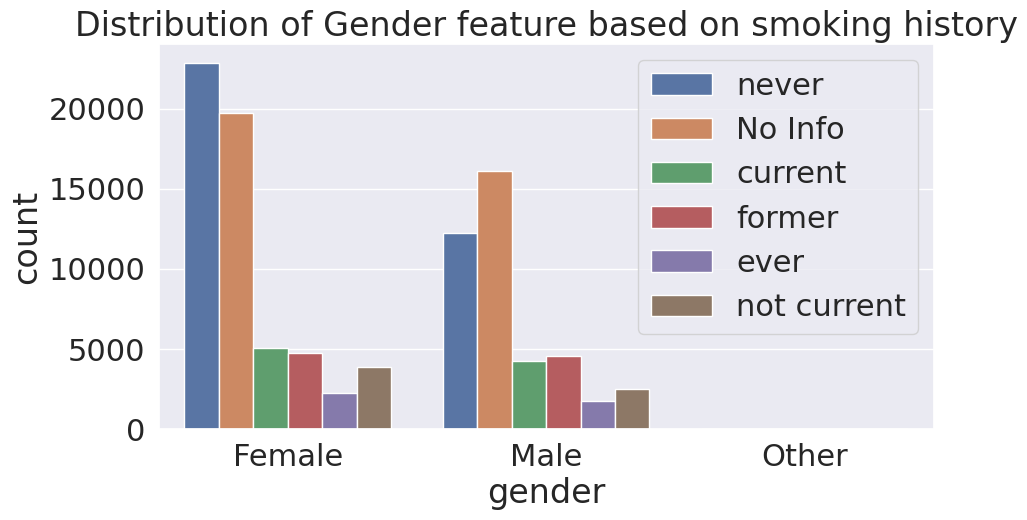

In [15]:
plt.figure(figsize=(10,5));
sns.set(font_scale=2)
sns.countplot(x='gender',data=data,hue='smoking_history');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on smoking history");

Membuat plot penyebaran diabetes berdasarkan riwayat merokok yang mengacu pada jenis kelamin(gender)

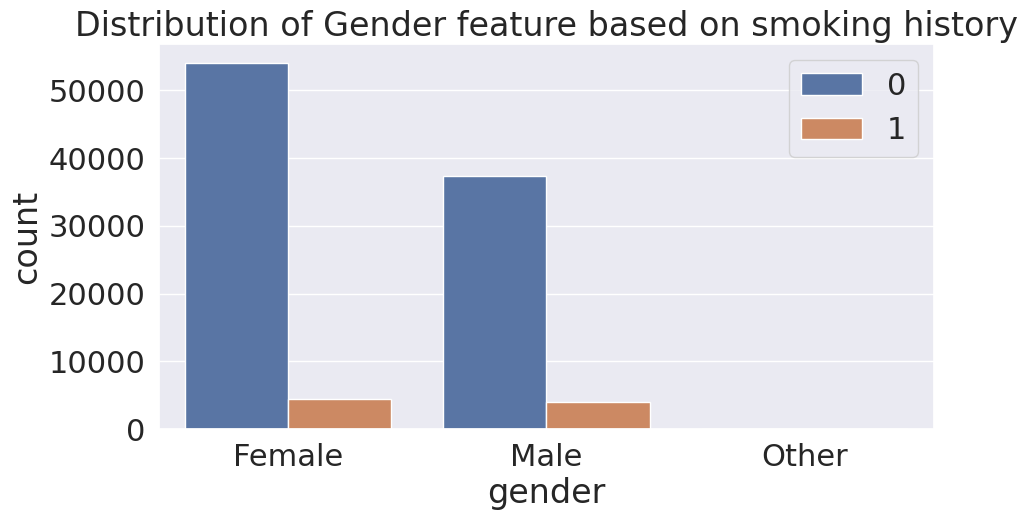

In [16]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender',data=data,hue='diabetes');
plt.legend(loc="upper right");
plt.title("Distribution of Gender feature based on smoking history");

Menyaring data dimana 'diabetes' bernilai 1

In [17]:
diabetes_data = data[data['diabetes'] == 1]

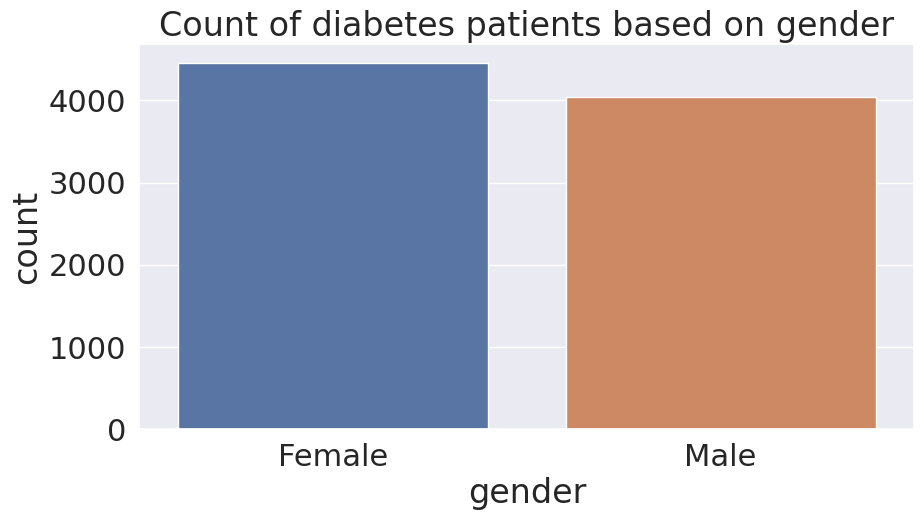

In [18]:
plt.figure(figsize=(10,5));
sns.countplot(x='gender', data=diabetes_data)
plt.title("Count of diabetes patients based on gender");


Dari graf diatas dapat disimpulkan bahwa pasien diabetes wanita jauh lebih banyak dibanding dengan pasien laki laki.

Membuat plot penyebaran diabetes berdasarkan usia

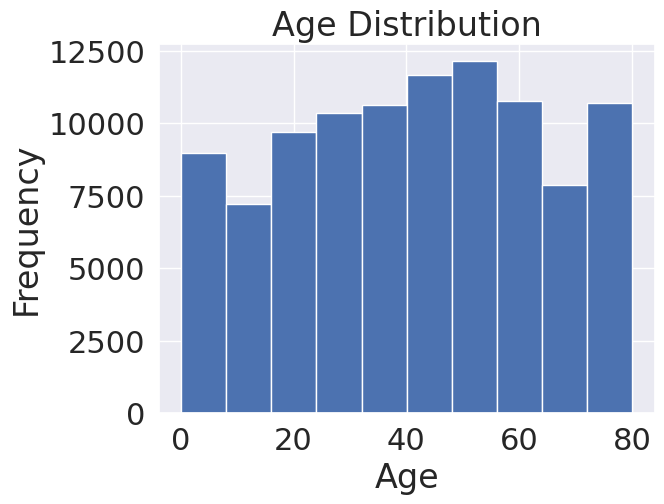

In [19]:
plt.hist(data['age']);
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Membuat pie chart yang berisi persentase orang-orang yang memiliki hipertensi

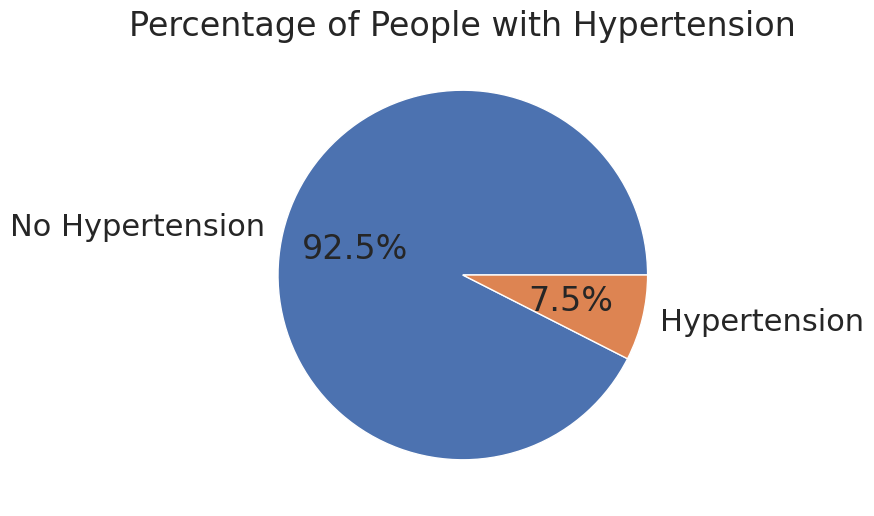

In [20]:
hypertension_counts = data['hypertension'].value_counts()
hypertension_percentage = hypertension_counts / len(data) * 100

plt.figure(figsize=(10,6))
labels = ['No Hypertension', 'Hypertension']
plt.pie(hypertension_percentage, labels=labels, autopct='%1.1f%%')

plt.title('Percentage of People with Hypertension')

plt.show()

Kasus diabetes yang dikelompokan berdasarkan dari riwayat merokok

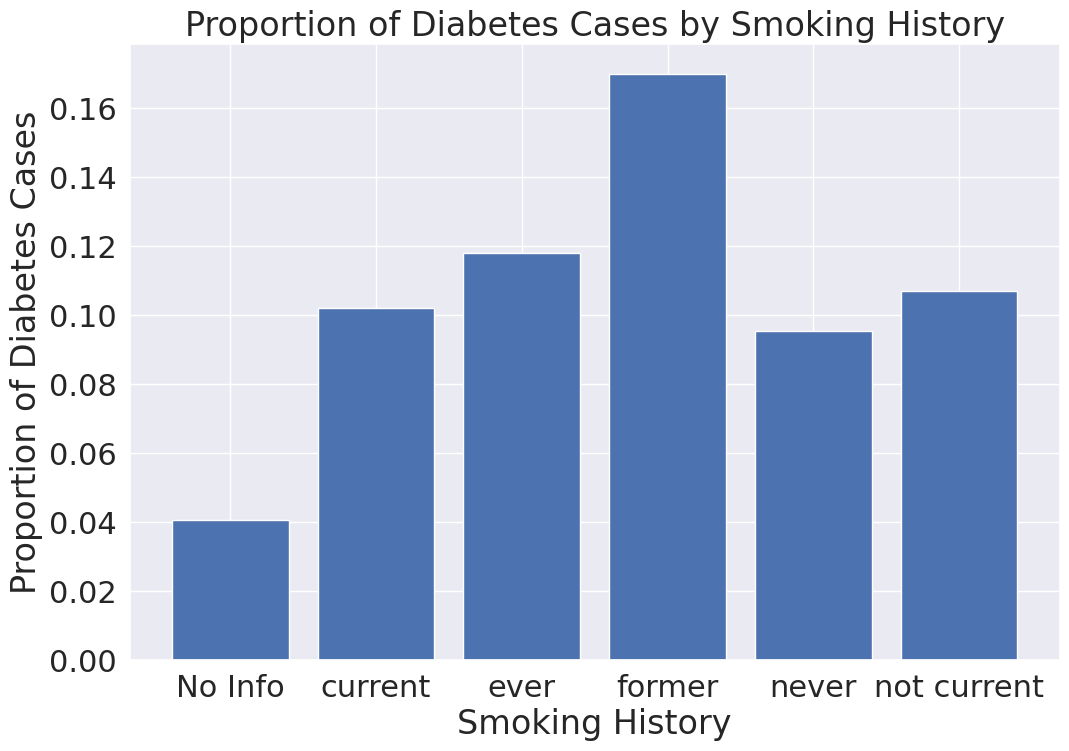

In [21]:
grouped_data = data.groupby('smoking_history')['diabetes'].mean()

plt.figure(figsize=(12,8))
plt.bar(grouped_data.index, grouped_data.values)

plt.title('Proportion of Diabetes Cases by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Proportion of Diabetes Cases')

plt.show()

Membagi data menjadi x dan y

In [22]:
X = data.drop('diabetes',axis=1)
y = data.diabetes

Membagi data latih dan data uji

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

Data latih menjadi 70% dan data uji sebanyak 30%

In [24]:
X_train.shape,X_test.shape

((70000, 8), (30000, 8))

Data Encoding, mengubah data kategorikal menjadi numerik

In [25]:
def encode_gender(label):
    if label == 'Female':
        return 0
    elif label == 'Male':
        return 1
    else:
        return 2

In [26]:
X_train.gender = X_train.gender.apply(encode_gender)
X_test.gender = X_test.gender.apply(encode_gender)

In [27]:
def encoder_smoking(label):
    if label == 'No Info':
        return 0
    elif label == 'never':
        return 1
    elif label == 'former':
        return 2
    elif label == 'current':
        return 3
    elif label == 'not current':
        return 4
    else:
        return 5

In [28]:
X_train['smoking_history'] = X_train['smoking_history'].apply(encoder_smoking)
X_test['smoking_history'] = X_test['smoking_history'].apply(encoder_smoking)

In [29]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
61308,1,65.0,0,1,0,27.32,4.5,140
14140,0,54.0,0,0,0,27.32,5.8,126
12343,1,47.0,0,0,1,23.19,3.5,145
98870,0,5.0,0,0,0,21.65,4.0,140
94108,0,54.0,0,0,0,53.72,4.8,126


Feature Selection

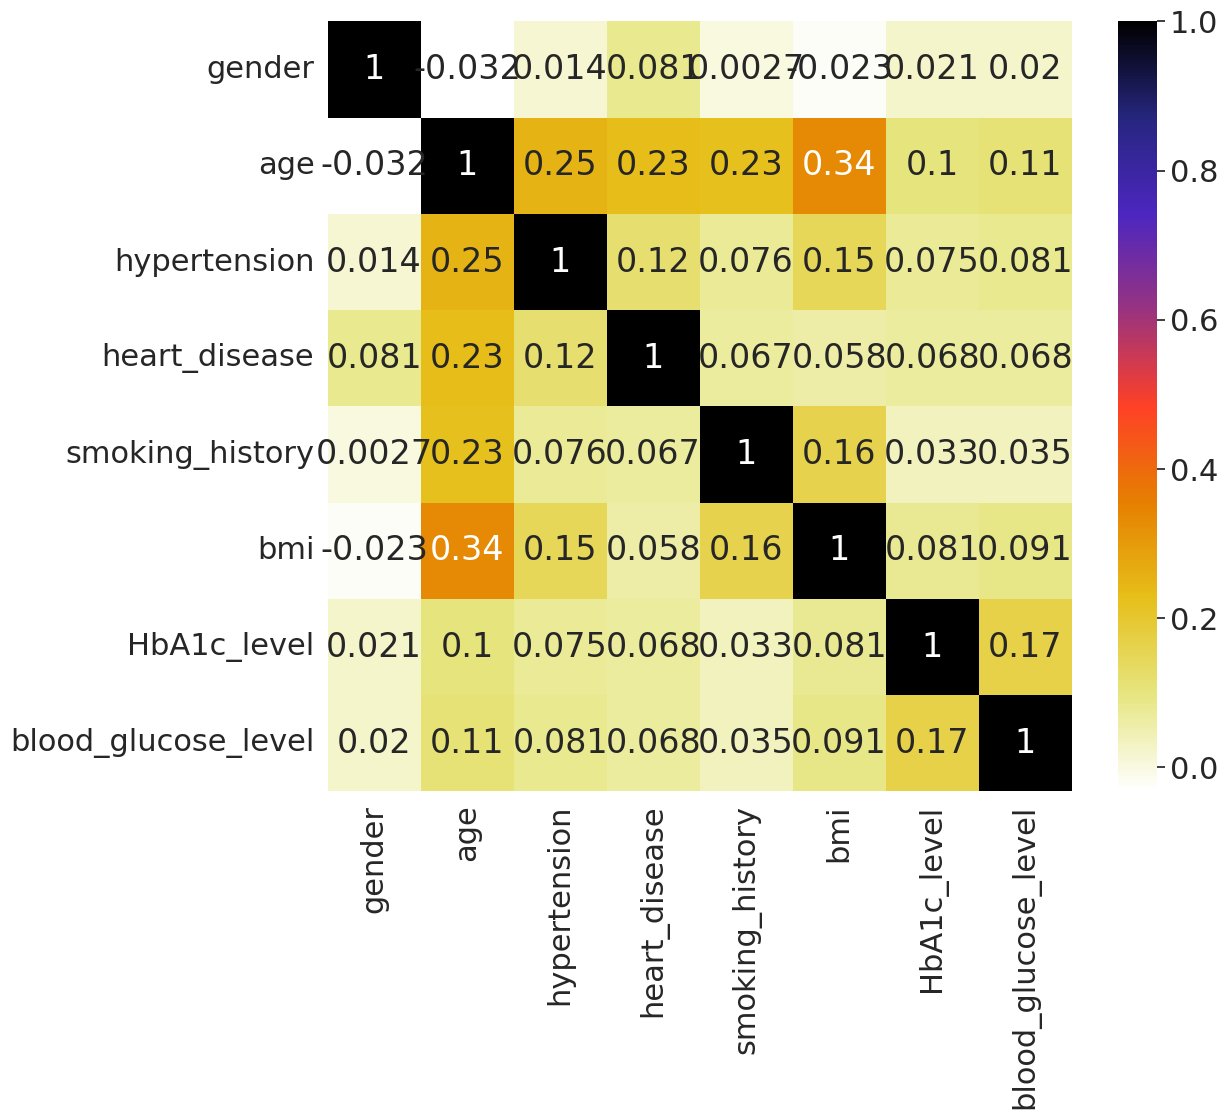

In [30]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r);
plt.show();

Dari heatmap diatas dapat disimpulkan bahwa tidak ada fitur yang berkorelasi tinggi satu sama lain.

In [31]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [32]:
const_cols = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]

In [33]:
const_cols

[]

Setelah menggunakan VarianceThreshold pada data latih, dapat dilihat bahwa tidak ada fitur yang memiliki varians rendah.

Menangani data yang tidak seimbang

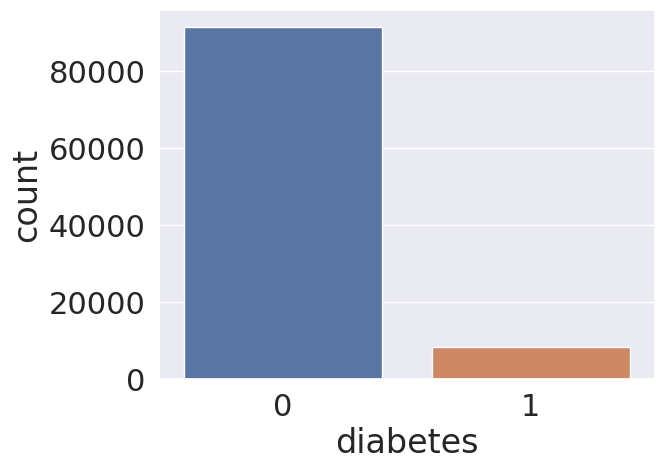

In [34]:
sns.countplot(x='diabetes',data=data);

Menurut count plot di atas, dataset yang digunakan tidak seimbang.
Maksud dari dataset yang tidak seimbang adalah satu kelas atau kategori memiliki jumlah contoh yang jauh lebih besar daripada kelas lain dalam dataset, sehingga disebut sebagai dataset yang tidak seimbang.

Karena dataset yang tidak seimbang maka digunakan SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_over, y_over = oversampler.fit_resample(X_train, y_train)

SMOTE (Synthetic Minority Over-sampling Technique) adalah teknik pengambilan sampel berlebih yang populer yang digunakan untuk mengatasi ketidakseimbangan kelas dalam set data.
SMOTE membantu mengatasi masalah ketidakseimbangan kelas dengan meningkatkan jumlah instance dalam kelas minoritas.

In [36]:
X_over.shape,y_over.shape

((128204, 8), (128204,))

In [37]:
scalar = StandardScaler()

Sesuaikan scaler pada data latih dan ubah data latih dan data uji

In [38]:
X_over_scaled = scalar.fit_transform(X_over)
X_test_scaled = scalar.transform(X_test)

# Pelatihan Model

In [39]:
model_names = []
accuracies = []

# Logistic Regression

In [40]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_over_scaled,y_over)
model_names.append('Logistic Regression')
accuracies.append(ceil(log_reg.score(X_test_scaled,y_test)*100))
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     27398
           1       0.42      0.86      0.56      2602

    accuracy                           0.88     30000
   macro avg       0.70      0.87      0.75     30000
weighted avg       0.94      0.88      0.90     30000



K nearest neighbor (KNN)

In [41]:
accuracy_rate = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_over_scaled,y_over,cv=3)
    accuracy_rate.append(score.mean())

Memilih nilai K

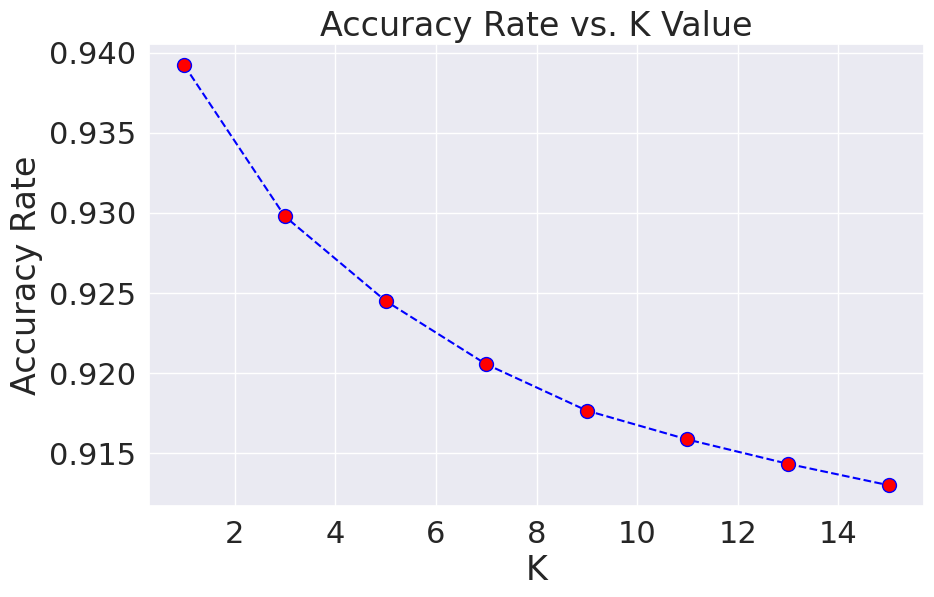

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16,2),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K');
plt.ylabel('Accuracy Rate');

In [43]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_over_scaled,y_over)
model_names.append('KNeighborsClassifier')
accuracies.append(ceil(knn.score(X_test_scaled,y_test)*100))
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     27398
           1       0.60      0.72      0.65      2602

    accuracy                           0.93     30000
   macro avg       0.78      0.84      0.81     30000
weighted avg       0.94      0.93      0.94     30000



Decision tree

In [44]:
parameter = {
    'criterion':["gini", "entropy", "log_loss"],
    'splitter' :["best", "random"],
    'max_depth':[1,2,3,4,5],
    'max_features':["auto", "sqrt", "log2"],
    'ccp_alpha':[1,2,3,4,5,6,7]
}

In [45]:
treemodel = DecisionTreeClassifier(max_depth=2)
cv = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [46]:
cv.fit(X_over_scaled,y_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'ccp_alpha': [1, 2, 3, 4, 5, 6, 7],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [47]:
cv.best_params_

{'ccp_alpha': 1,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'best'}

In [48]:
y_pred = cv.predict(X_test_scaled)

In [49]:
model_names.append('Decision Tree')
accuracies.append(ceil(cv.score(X_test_scaled,y_test)*100))

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27398
           1       0.00      0.00      0.00      2602

    accuracy                           0.91     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.83      0.91      0.87     30000



Membuat plot hasil perbandingan akurasi dari model yang digunakan


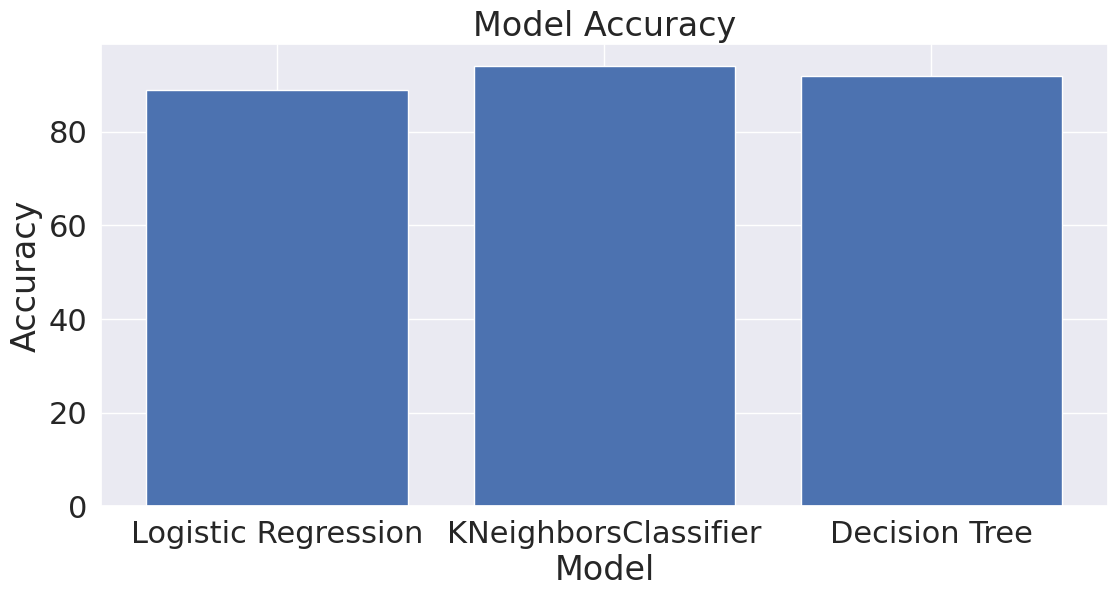

In [51]:
plt.figure(figsize=(13,6));
plt.bar(model_names, accuracies);

plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.show()

Dari Plot di atas dapat dilihat bahwa model KNN adalah memiliki nilai akurasi tertinggi dibanding dengan Logistic Regression dan Decision Tree.